<a href="https://colab.research.google.com/github/thetime50/colab-notebook/blob/main/machine-learning/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

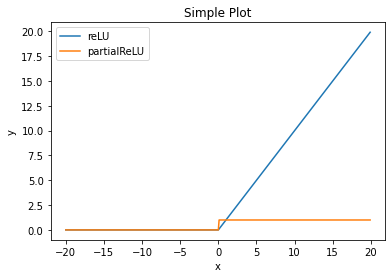

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random


class Fun:
  def __init__(self,fun,pFun):
    self.fun = fun
    self.pFun = pFun

reLU = Fun( (lambda x:x>0 and x or 0),(lambda x:x>0 and 1 or 0))


x = np.array(range(-200,200,1),np.float16)/10
yr = [ reLU.fun(i) for i in x]
ypr = [ reLU.pFun(i) for i in x]

plt.plot(x, yr, label='reLU')
plt.plot(x, ypr, label='partialReLU')

plt.xlabel('x')
plt.ylabel('y')

plt.title("Simple Plot")

plt.legend()

plt.show()

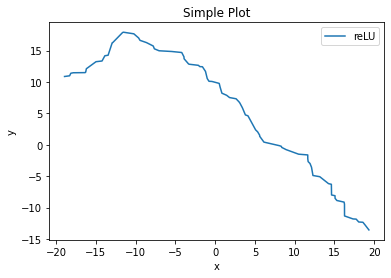

getLoss 43094500.9946859
PartialW,PartialB -978178.4378358417 -54747.74870651545
Adagrad-notime w:-1.4168 b:12.8915 loss:397.6320


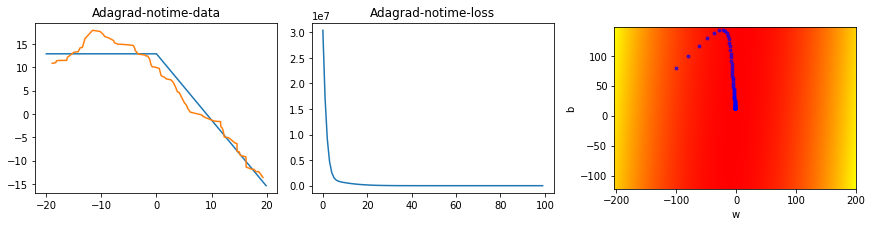

Adagrad w:-1.4531 b:13.3260 loss:406.8459


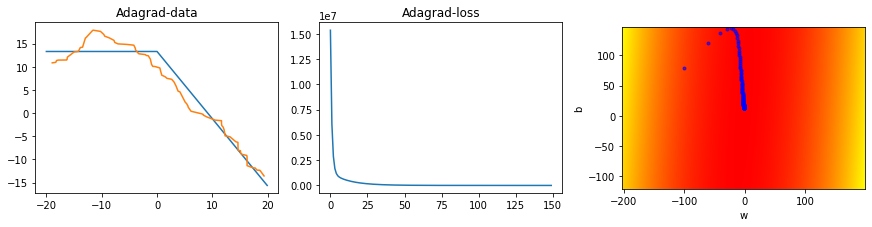

0.10002429316397965


In [ ]:
class Neurel:
  def __init__(self,w,b,f=reLU):
    self.w=w
    self.b=b
    self.f=f
  def fun(self,x):
    return self.f.fun(x) * self.w + self.b
  def pFun(self,x):
    return self.f.pFun(x) + self.w

network=Neurel(-100,200)
LEN = 80
x= [random.random()*40-20 for x in range(LEN)]
y= [random.random()*40-20 for x in range(LEN)]
x.sort()
y.sort(reverse=True)
y = [(y[i]>12 and 24-y[i] or y[i])+6 for i in range(LEN)]
# print(x)
class Data:
  def __init__(self,x,y):
    self.x = x
    self.y = y
data = Data(x,y)#[[x[i],y[i]] for i in range(LEN)]

plt.plot(x, y, label='reLU')

plt.xlabel('x')
plt.ylabel('y')

plt.title("Simple Plot")

plt.legend()

plt.show()

def getLoss(nw,data):
  sq = [(data.y[i] - nw.fun(data.x[i]))**2 for i in range(len(data.x))]
  return sum(sq)

print('getLoss' ,getLoss(network,data))

def getPartialW(nw,data):
  def getPwi(x,y):
    if x<0: return 0
    else: return 2*(y-nw.fun(x))*-x # todo 这里不是通用的
  return sum([getPwi(data.x[i], data.y[i], ) for i in range(len(data.x))])
def getPartialB(nw,dat):
  # def getPbi(x,y):
  getPbi = lambda x,y: 2*(y-nw.fun(x))*-1
  return sum([getPbi(data.x[i], data.y[i], ) for i in range(len(data.x))])

print('PartialW,PartialB',
  getPartialW(network,data ),
  getPartialB(network,data )
)

ETA = 0.00002

def gradientDescent(nw,data):
  eta=ETA
  for i in range(500):
    pw=getPartialW(nw,data )
    pb=getPartialB(nw,data )
    nw.w = nw.w - eta*pw
    nw.b = nw.b - eta*pb
    i%20 == 0 and print(i,'getLoss' ,pw,getLoss(network,data))

newRate = 0.2
def gradientDescent1(nw,data):
  eta=ETA
  pwf = getPartialW(nw,data )
  pbf = getPartialB(nw,data )
  for i in range(500):
    pw=getPartialW(nw,data )
    pb=getPartialB(nw,data )
    nw.w = nw.w - eta*pw
    nw.b = nw.b - eta*pb # (pb-pbf)/pbf
    i%20 == 0 and print(i,'getLoss' ,getLoss(network,data))
    pwf = (1-newRate)*pwf + newRate*pw
    pbf = (1-newRate)*pbf + newRate*pb
def gradientDescentAdagrad(nw,data,eta=ETA,type=0,epoch=100):
  sumSqW = 0
  sumSqB = 0
  loss = []
  w=[]
  b=[]
  w.append(nw.w)
  b.append(nw.b)
  for i in range(epoch):
    pw=getPartialW(nw,data )
    pb=getPartialB(nw,data )
    sumSqW = sumSqW + pw**2
    sumSqB = sumSqB + pb**2
    # print(i,'w:{:.4f} b:{:.4f} pw:{:.4f} pb:{:.4f}'.format(nw.w,nw.b,pw,pb))
    if type==0: # 不随时间衰减
      nw.w = nw.w - eta*pw/(sumSqW/(i+1))**0.5
      nw.b = nw.b - eta*pb/(sumSqB/(i+1))**0.5
    elif type==1: # 随时间衰减
      # i%20 == 0 and print(eta*pb/sumSqB**0.5)
      nw.w = nw.w - eta*pw/sumSqW**0.5
      nw.b = nw.b - eta*pb/sumSqB**0.5
    w.append(nw.w)
    b.append(nw.b)
    l=getLoss(nw,data)
    loss.append(l)
    # (i%10 == 0 ) and print(i,'getLoss {:.4f} {:.4f} {:.4f}'.format( l,pb,(sumSqB/(i+1))**0.5))
  return {
    'loss':loss,
    'w':w,
    'b':b,
  }

def getResolutData(fun,xaxis):
  return [fun(xaxis[i]) for i in range(len(xaxis))]
import math
from matplotlib import cm
def drawGradient(axe,nw,data,xs,ys,gdRes,step=1): # w / b
  # 6:4
  xc=nw.w
  yc=nw.b
  # print(getLoss(Neurel(xc,yc),data),getLoss(Neurel(math.ceil(xc),math.ceil(yc)),data))
  dx=abs(xs-xc)
  dy=abs(ys-yc)
  x2y = 4*dx/6
  y2x = 6*dy/4
  if dx<y2x: dx = y2x
  if dy<x2y: dy = x2y
  dx= math.ceil(dx*2)#1.2
  dy= math.ceil(dy*2)#1.2

  xStaet = xc-dx
  xEnd = xc+dx
  yStaet = yc-dy
  yEnd = yc+dy

  xrange = np.arange(xStaet, xEnd, step)
  yrange = np.arange(yStaet, yEnd, step)
  # print(xrange,yrange)
  z=np.array([[getLoss(Neurel(x,y),data) for x in xrange] for y in yrange])
  
  plt.xlabel('w')
  plt.ylabel('b')
  plt.imshow(z,extent=[xStaet,xEnd,yStaet,yEnd],cmap=cm.autumn)#plasma autumn 
  xCenter = z[:,math.floor(len(xrange)/2)]
  yCenter = z[math.floor(len(yrange)/2)]
  ct = z[math.floor(len(yrange)/2),math.floor(len(xrange)/2)]
  for i in range(len(gdRes['w'])):
    axe.plot(gdRes['w'][i], gdRes['b'][i], '.b', alpha=.6)
    axe.plot(gdRes['w'][i], gdRes['b'][i], '-b', alpha=.3)
  # print('center loss {:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(
  #   getLoss(Neurel(xc,yc),data),ct,xCenter[0],xCenter[-1],yCenter[0],yCenter[-1]
  # ))
  # print(z[math.floor(len(yrange)/2)-1:math.floor(len(yrange)/2)+2,math.floor(len(xrange)/2)-1:math.floor(len(xrange)/2)+2])

def drawGraph(title,data,xaxis,nw,ws,bs,gdRes):
  print('{} w:{:.4f} b:{:.4f} loss:{:.4f}'.format(title,nw.w,nw.b,getLoss(nw,data)))
  y = getResolutData(nw.fun,xaxis)
  # plt.figure(figsize=(6*3,4))
  fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(6*3,4))# figsize=(10, 5)
  # fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True,figsize=(4*3,3))# figsize=(10, 5)
  # fig, axes = plt.subplot(131)
  axes[0].set_title('{}-data'.format(title))
  axes[0].plot(xaxis,y,label='data')
  axes[0].plot(data.x,data.y,label='fun')
  # plt.subplot(132)
  axes[1].set_title('{}-loss'.format(title))
  axes[1].plot(range(len(gdRes['loss'])),gdRes['loss'],label='loss')
  # plt.subplot(133)
  drawGradient(axes[2],nw,data,ws,bs,gdRes)
  plt.show()

weightStart = -100
biasStart = 80
# weightStart = -100
# biasStart = -120
xaxis = np.array(range(-200,200,1),np.float16)/10
# gradientDescent(network,data)
nwAdagradNt=Neurel(weightStart,biasStart)
nwAdagrad=Neurel(weightStart,biasStart)
graAdagradNt = gradientDescentAdagrad(nwAdagradNt,data,ETA*1000000,0)
graAdagrad = gradientDescentAdagrad(nwAdagrad,data,ETA*1000000*2,1,150)


# print(plt.rcParams["figure.figsize"])
# plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
drawGraph('Adagrad-notime',data,xaxis,nwAdagradNt,weightStart,biasStart,graAdagradNt)
drawGraph('Adagrad',data,xaxis,nwAdagrad,weightStart,biasStart,graAdagrad)

print(getPartialB(nwAdagradNt,data))

In [ ]:
# print(dir(cm))

[[-0.00067093 -0.0007195  -0.00077089 ...  0.00077089  0.0007195
   0.00067093]
 [-0.0007268  -0.00077942 -0.00083509 ...  0.00083509  0.00077942
   0.0007268 ]
 [-0.0007867  -0.00084365 -0.00090391 ...  0.00090391  0.00084365
   0.0007867 ]
 ...
 [-0.0007867  -0.00084365 -0.00090391 ...  0.00090391  0.00084365
   0.0007867 ]
 [-0.0007268  -0.00077942 -0.00083509 ...  0.00083509  0.00077942
   0.0007268 ]
 [-0.00067093 -0.0007195  -0.00077089 ...  0.00077089  0.0007195
   0.00067093]] [-2.0, 2.0, -2.0, 2.0]


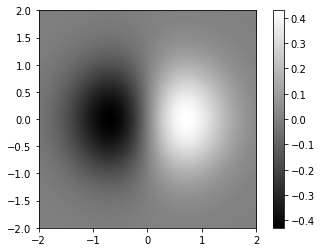

In [ ]:
#func2d.py
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

y,x = np.ogrid[-2:2:200j,-2:2:200j]
z = x * np.exp(-x**2-y**2)
extent = [np.min(x),np.max(x),np.min(y),np.max(y)]
print(z,extent)
plt.imshow(z,extent=extent,cmap=cm.gray)
plt.colorbar()
plt.show()